# Limpeza de Dados de Séries Temporais

Dando prosseguimento à análise, durante a exploração de dados identificamos a presença de outliers. Nesta etapa, iremos verificá-los e realizar a limpeza necessária para garantir que nosso dataset esteja pronto para a modelagem.

In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

In [2]:
# Carregamento de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.limpeza_dados import (
    testa_estacionaridade,
    processar_grupo,
    visualizar_outliers,
    visualizar_outliers_grid,
    visualizar_sales_imputed,
)

In [3]:
# Carramentos do arquivo de vendas
df_sales = pd.read_parquet("../data/interim/sales_exploratory_cleaned.parquet")

In [4]:
#Exibindo os primeiros registros do dataframe
df_sales.head()

,store_id,cat_id,sales,series_id
date,,,,
2011-01-29,TX_1,FOODS,3950.35,TX_1_FOODS
2011-01-30,TX_1,FOODS,3844.97,TX_1_FOODS
2011-01-31,TX_1,FOODS,2888.03,TX_1_FOODS
2011-02-01,TX_1,FOODS,3631.28,TX_1_FOODS
2011-02-02,TX_1,FOODS,3072.18,TX_1_FOODS


In [5]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54391 entries, 2011-01-29 to 2016-05-22
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   store_id   54391 non-null  object 
 1   cat_id     54391 non-null  object 
 2   sales      54391 non-null  float64
 3   series_id  54391 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.1+ MB


In [6]:
print(df_sales.index)

DatetimeIndex(['2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01',
               '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-05',
               '2011-02-06', '2011-02-07',
               ...
               '2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16',
               '2016-05-17', '2016-05-18', '2016-05-19', '2016-05-20',
               '2016-05-21', '2016-05-22'],
              dtype='datetime64[ns]', name='date', length=54391, freq=None)


In [7]:
resultados_df = pd.DataFrame()

for grupo, valores in df_sales.groupby(["store_id", "cat_id"], group_keys=False):
    label = "_".join(map(str, grupo))

    # Selecionando apenas a coluna de vendas e ordenando por data
    serie_temporal = valores["sales"].sort_index()

    # Executando o teste e armazenando o resultado
    resultado = testa_estacionaridade(serie_temporal, nome=label, plot=False)
    resultados_df = pd.concat([resultados_df, resultado], ignore_index=True)

resultados_df

,Série,Estatística do Teste,Valor-p,Número de Lags,Número de Observações,Valor Crítico (1%),Valor Crítico (5%),Valor Crítico (10%),Estacionária?
0,CA_1_FOODS,-1.818112,0.371508,26,1914,-3.433771,-2.863051,-2.567575,False
1,CA_1_HOBBIES,-0.980745,0.760222,26,1914,-3.433771,-2.863051,-2.567575,False
2,CA_1_HOUSEHOLD,-1.095486,0.716869,26,1914,-3.433771,-2.863051,-2.567575,False
3,CA_2_FOODS,-1.422963,0.571219,14,342,-3.449616,-2.870028,-2.571292,False
4,CA_2_HOBBIES,-0.672179,0.853825,26,1914,-3.433771,-2.863051,-2.567575,False
5,CA_2_HOUSEHOLD,-0.048278,0.954353,26,1914,-3.433771,-2.863051,-2.567575,False
6,CA_3_FOODS,-2.460778,0.125311,26,1914,-3.433771,-2.863051,-2.567575,False
7,CA_3_HOBBIES,-0.972828,0.763045,26,1914,-3.433771,-2.863051,-2.567575,False
8,CA_3_HOUSEHOLD,-1.252132,0.650778,22,1918,-3.433764,-2.863048,-2.567573,False
9,CA_4_FOODS,-1.366729,0.598119,26,1914,-3.433771,-2.863051,-2.567575,False


Podemos interpretar os resultados da seguinte forma:

- A maioria das séries não é estacionária, o que indica a presença de tendência ou sazonalidade confirmando o que já tinhamos visto na exploração dos dados.
- Apenas WI_3_HOBBIES foi classificada como estacionária (p < 0.05).
- As categorias FOODS e HOUSEHOLD apresentam forte não estacionariedade, sugerindo um crescimento ao longo do tempo.
- HOBBIES tem séries mais próximas de estacionárias, o que pode indicar menor influência de tendência.

Como a maioria das séries não é estacionária, é provável que exista uma forte tendência de longo prazo ou padrões sazonais nas vendas. No entanto, devemos considerar a presença de possíveis outliers, que podem distorcer a média e a variância da série, impactando o teste ADF. Além disso, outliers podem gerar falsos sinais de não estacionariedade. Portanto, é essencial investigar mais a fundo esses outliers antes de tomar decisões baseadas nos resultados do teste.

No contexto do nosso projeto, a identificação da estacionariedade da série temporal tem impacto mais relevante na geração de insights do que na previsão propriamente dita. Isso ocorre porque os algoritmos que utilizaremos não dependem fortemente da estacionariedade ou já possuem mecanismos internos para lidar com tendências e sazonalidades automaticamente.

### Outliers

O método IQR é amplamente utilizado na detecção de outliers em séries temporais devido à sua simplicidade e eficácia. Conforme descrito no livro [Forecasting: Principles and Practice](https://otexts.com/fpp3/missing-outliers.html), o IQR é uma abordagem robusta para identificar valores anômalos.

No entanto, ao lidar com séries que apresentam uma forte tendência ou sazonalidade, a aplicação direta do IQR pode resultar em falsos positivos, pois esses padrões naturais podem ser confundidos com outliers. De acordo com o clássico livro Time Series Analysis: Forecasting and Control (Box, Jenkins, Reinsel & Ljung, 2015), a presença de tendências pode distorcer a análise estatística, tornando essencial a estabilização da série antes da detecção de anomalias.

Para mitigar esse problema, adotamos a estratégia de remover a tendência da série (detrending) antes de aplicar o método IQR, garantindo que a variabilidade residual reflita apenas flutuações inesperadas e não efeitos estruturais da série temporal.

In [8]:
# Aplica a função de processamento a cada grupo de store_id e cat_id
outlier_marked_df = df_sales.groupby(["store_id", "cat_id"], group_keys=False).apply(
    processar_grupo
)

outlier_marked_df

,store_id,cat_id,sales,series_id,sales_detrend,anomaly
date,,,,,,
2011-01-29,CA_1,FOODS,7240.65,CA_1_FOODS,1494.960186,False
2011-01-29,CA_1,HOBBIES,1369.91,CA_1_HOBBIES,472.980247,False
2011-01-29,CA_1,HOUSEHOLD,2322.60,CA_1_HOUSEHOLD,322.774191,False
2011-01-29,CA_2,HOBBIES,1031.81,CA_2_HOBBIES,242.910122,False
2011-01-29,CA_2,HOUSEHOLD,3357.57,CA_2_HOUSEHOLD,672.305430,False
...,...,...,...,...,...,...
2016-05-22,WI_2,HOBBIES,1181.54,WI_2_HOBBIES,49.131547,False
2016-05-22,WI_2,HOUSEHOLD,4499.18,WI_2_HOUSEHOLD,855.824060,False
2016-05-22,WI_3,FOODS,8485.18,WI_3_FOODS,2783.239587,False


Basicamente, a função que criamos realiza a detecção de outliers em séries temporais removendo primeiro a tendência dos dados com signal.detrend(), garantindo que os outliers identificados sejam flutuações anômalas reais e não apenas reflexo de uma tendência. Em seguida, calcula o Intervalo Interquartil (IQR) e define os limites para detectar outliers como valores fora do intervalo Q1 - 3 * IQR e Q3 + 3 * IQR, marcando esses pontos na coluna "anomaly". Esse processo é aplicado separadamente para cada combinação de store_id e cat_id, garantindo uma análise segmentada e precisa para diferentes lojas e categorias de produtos

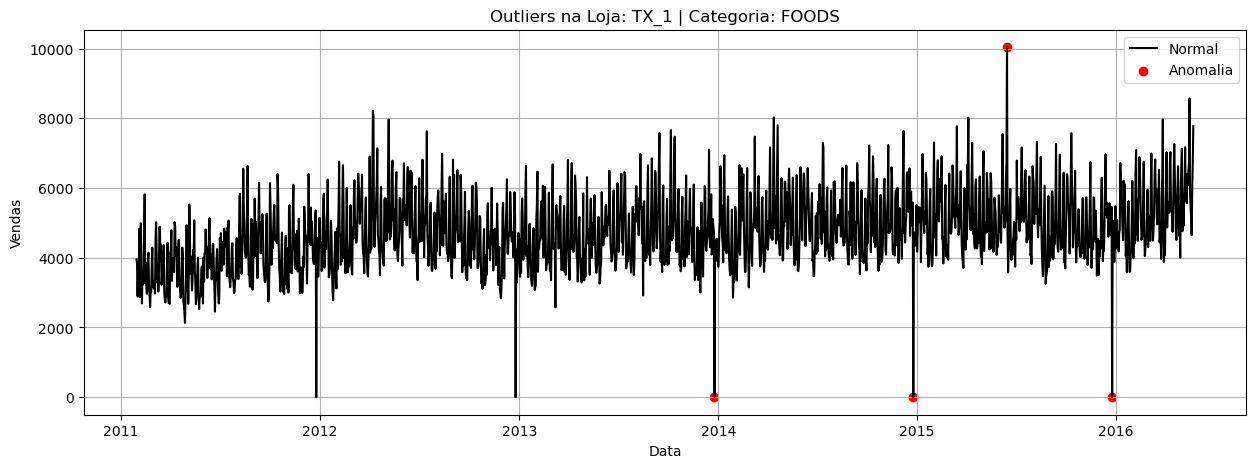

In [9]:
visualizar_outliers(outlier_marked_df, "TX_1", "FOODS")

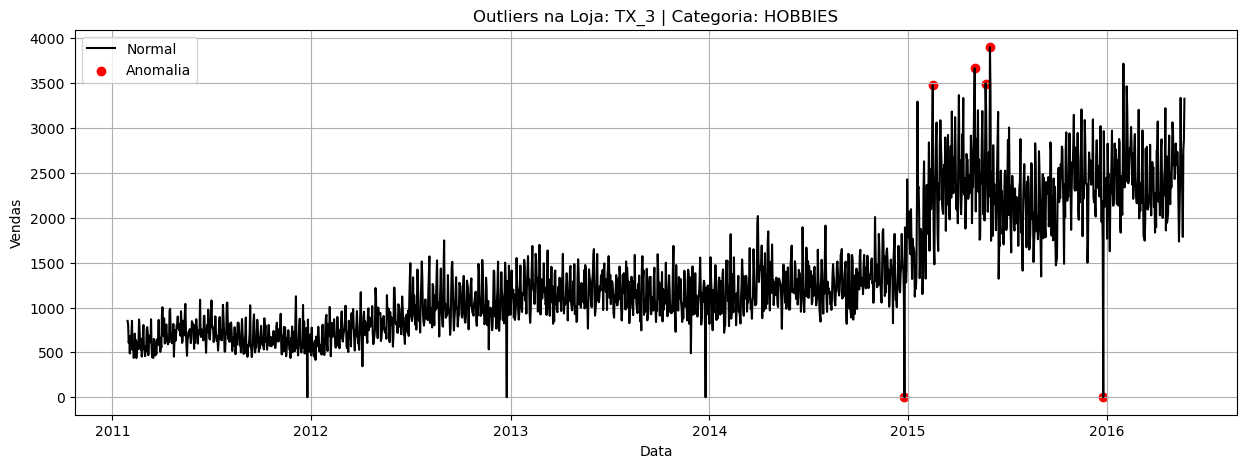

In [10]:
visualizar_outliers(outlier_marked_df, "TX_3", "HOBBIES")

No geral, o método conseguiu capturar a maioria dos outliers, conforme observado nos gráficos, identificando corretamente pontos anômalos que também seriam percebidos pelo julgamento humano. No entanto, alguns outliers podem ter passado despercebidos, e podemos analisá-los mais detalhadamente para marcar manualmente os pontos que realmente se desviam do comportamento esperado. Além disso, notamos que, no final da série temporal da loja CA_2 para a categoria FOODS, alguns pontos parecem ter sido erroneamente classificados como outliers. Isso pode ter ocorrido devido a um crescimento acentuado nas vendas nesse período, que o modelo interpretou como desvios anômalos. Nesse caso, pode ser necessário um ajuste na abordagem para evitar a marcação indevida de outliers em períodos de tendência de alta. Uma solução seria utilizar uma abordagem mais dinâmica para definir limites ou aplicar um método complementar para diferenciar tendências de outliers reais.

Além disso, outras categorias também podem ter sido marcadas incorretamente, o que torna essencial uma verificação visual das classes para garantir que os outliers identificados pelo modelo realmente representam desvios inesperados e não apenas padrões naturais da série. 

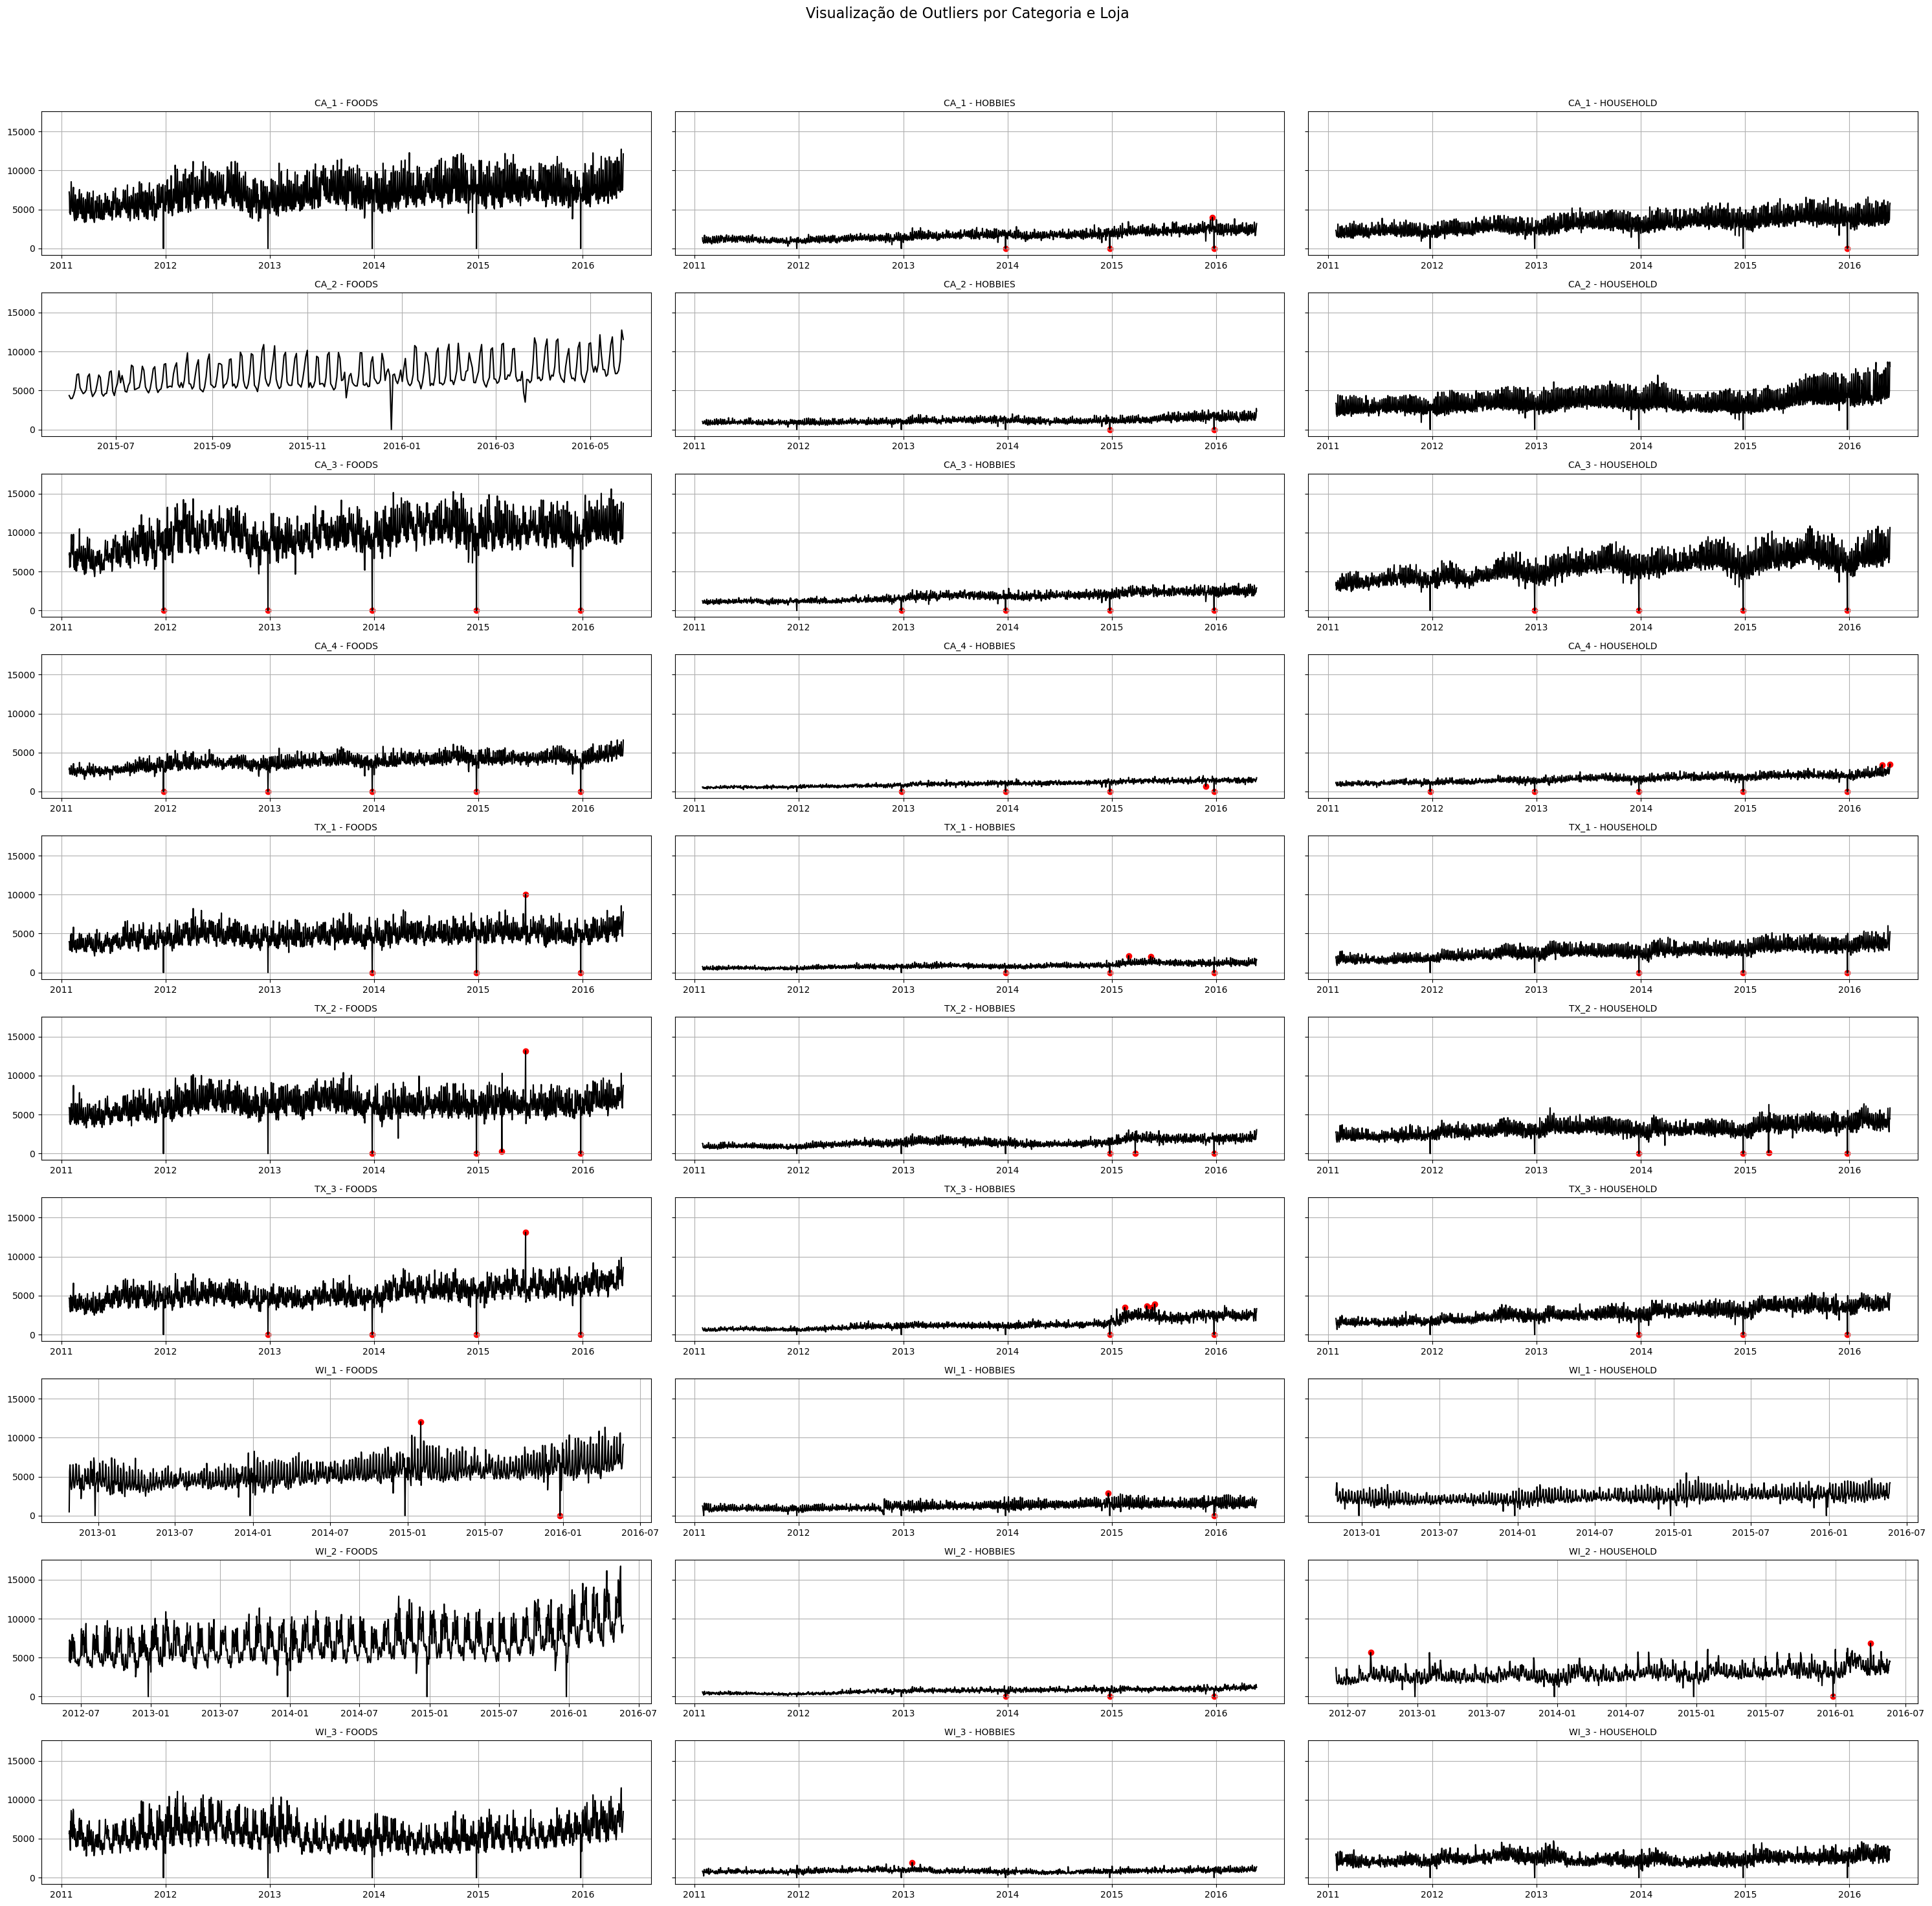

In [11]:
# Valores únicos de store_id e cat_id
lojas = outlier_marked_df.store_id.unique()
categorias = outlier_marked_df.cat_id.unique()

visualizar_outliers_grid(outlier_marked_df, lojas, categorias)

Como podemos perceber, além da loja CA_2 para a categoria FOODS, que foi erroneamente marcada como outlier, a categoria HOBBIES para as filiais TX_1 e TX_3 e a loja CA_4 para a categoria HOUSEHOLD também apresentam problemas de marcação incorreta de outliers, como podemos verificar nos gráficos individuais abaixo.

Devemos apenas levar em conta que esse procedimento é viável porque temos um conjunto relativamente pequeno de combinações de loja e categoria, o que ainda permite verificações visuais manuais. No entanto, se tivéssemos um número significativamente maior de combinações, a abordagem manual se tornaria inviável. Nesse caso, o ideal seria aplicar um método mais escalável de detecção de outliers, como técnicas baseadas em aprendizado de máquina ou modelos estatísticos adaptativos, para garantir uma análise eficiente e automatizada.

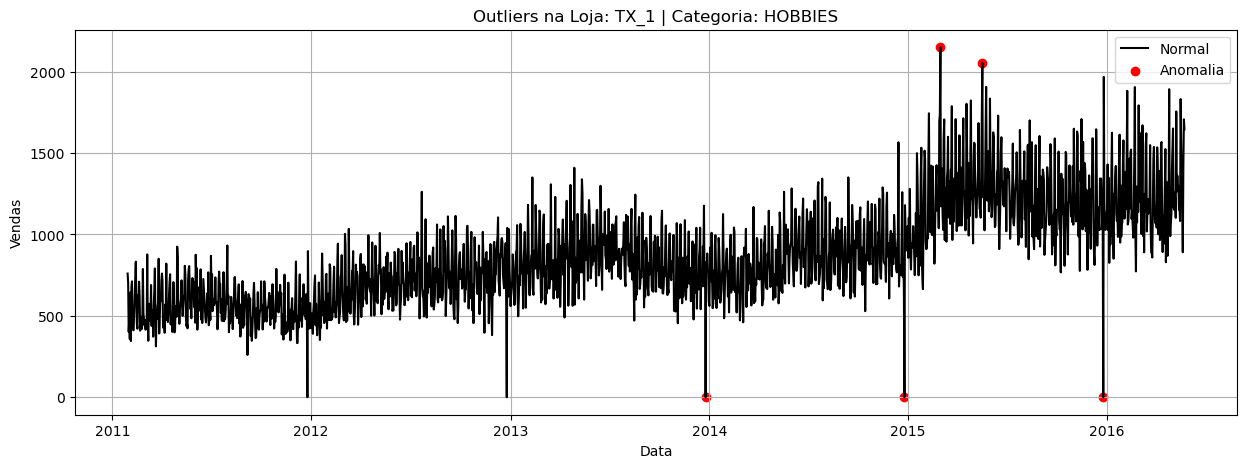

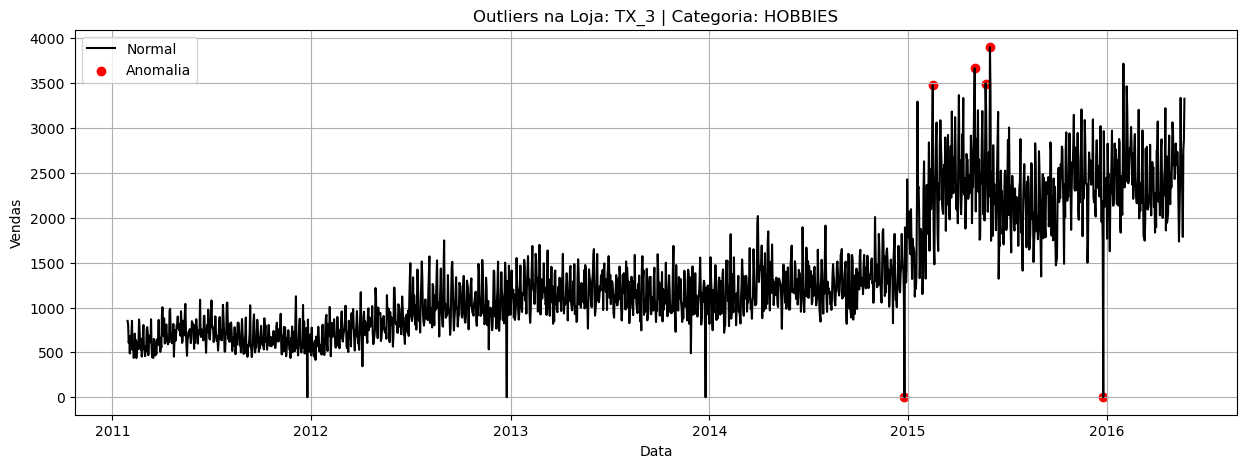

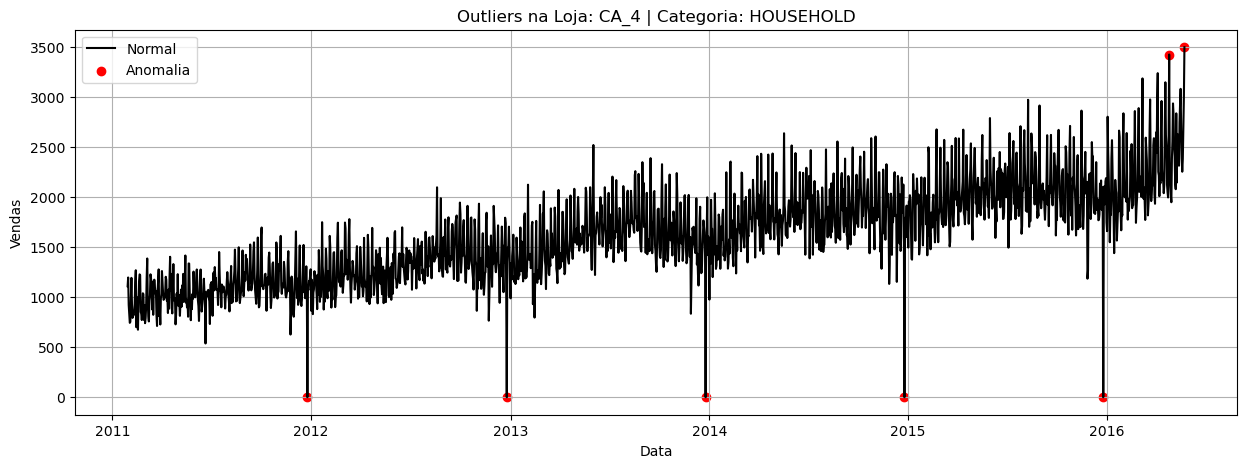

In [12]:
visualizar_outliers(outlier_marked_df, "TX_1", "HOBBIES")
visualizar_outliers(outlier_marked_df, "TX_3", "HOBBIES")
visualizar_outliers(outlier_marked_df, "CA_4", "HOUSEHOLD")

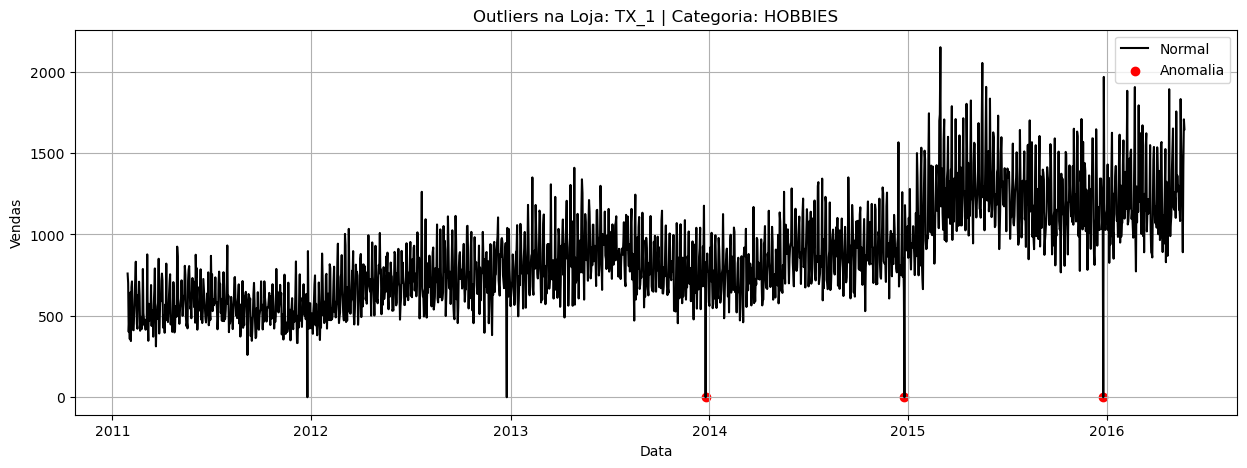

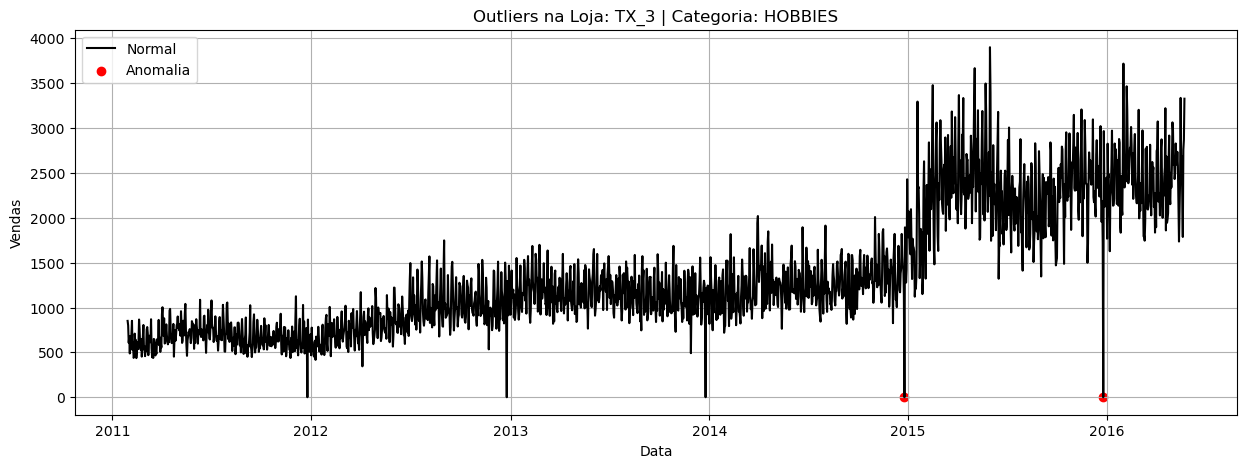

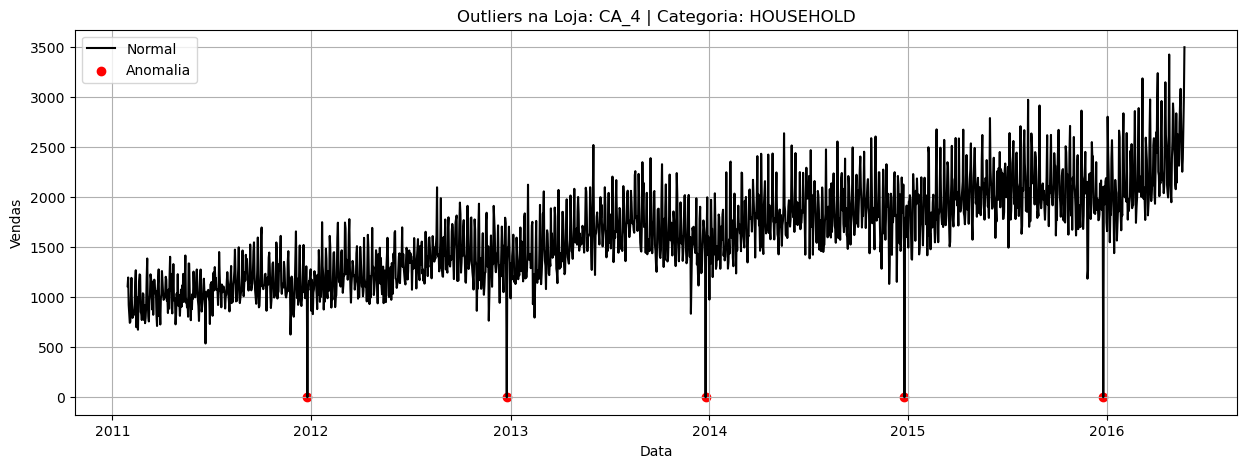

In [13]:
# Desmarcando outliers de forma manual
outlier_marked_df['anomaly'] = outlier_marked_df.apply(lambda x: False if x.store_id=='TX_1' and x.cat_id=='HOBBIES' and x.sales>2000 else x.anomaly, 1)
outlier_marked_df['anomaly'] = outlier_marked_df.apply(lambda x: False if x.store_id=='TX_3' and x.cat_id=='HOBBIES' and x.sales>3000 else x.anomaly, 1)
outlier_marked_df['anomaly'] = outlier_marked_df.apply(lambda x: False if x.store_id=='CA_4' and x.cat_id=='HOUSEHOLD' and x.sales>3000 else x.anomaly, 1)

visualizar_outliers(outlier_marked_df, "TX_1", "HOBBIES")
visualizar_outliers(outlier_marked_df, "TX_3", "HOBBIES")
visualizar_outliers(outlier_marked_df, "CA_4", "HOUSEHOLD")

Ao filtrarmos e analisarmos mais de perto os pontos com vendas próximas de zero, percebemos que esses outliers ocorrem, em grande parte, no dia 25 de dezembro, o que sugere um efeito relacionado ao Natal. Após conversarmos com o responsável pelos dados, foi confirmado que as lojas fecham no Natal, o que explica as vendas próximas de zero nesse dia.

Diante disso, por enquanto, vamos manter esses pontos marcados como outliers, mas com a ressalva de que, ao realizar previsões, precisaremos garantir que as vendas esperadas para o Natal sejam ajustadas corretamente para zero.

Além disso, para lidar com os outliers de forma mais robusta, o próximo passo será substituir os valores de vendas dos outliers por nulos. Idealmente, esse é um processo que deve ser feito com uma análise mais aprofundada, considerando o contexto de cada ponto. Conversar com o responsável pelos dados é essencial para entender se esses outliers refletem eventos legítimos (como o fechamento das lojas no Natal) ou se são erros no conjunto de dados.

No caso específico dos pontos do Natal, eles representam um efeito de calendário, que poderia ser tratado de diferentes formas. Em alguns modelos, poderíamos simplesmente manter esses pontos e incluir variáveis auxiliares que representem esses efeitos sazonais. No entanto, como utilizaremos um modelo univariado, faz mais sentido remover esses efeitos do calendário para evitar interferências na análise.

Antes de substituir os outliers por valores nulos, também verificaremos se já existem registros com vendas nulas no conjunto de dados, para que possamos tratar essas ocorrências de forma adequada no próximo passo de checagem da qualidade dos dados e imputação. 

In [14]:
# marcar pontos como outliers
outlier_marked_df["anomaly"] = outlier_marked_df.apply(
    lambda x: True if x.name.month == 12 and x.name.day == 25 else x.anomaly, axis=1
)

print(f"No total, detectamos {outlier_marked_df.anomaly.sum()} outliers.")

No total, detectamos 155 outliers.


### Valores Ausentes

Primeiro, vamos verificar a quantidade de valores presentes em nosso dataset.

In [15]:
# check number of rows with missing sales
sum(outlier_marked_df.sales.isna())

0

In [16]:
outlier_marked_df.loc[outlier_marked_df["anomaly"] == 1, "sales"] = np.nan

sum(outlier_marked_df.sales.isna())

155

Agora que identificamos os valores ausentes, podemos prosseguir com a imputação das vendas faltantes. Como o número de registros nulos é pequeno e não há períodos prolongados sem dados, utilizaremos a interpolação linear para preenchê-los.

Antes disso, definiremos as colunas date, store_id e cat_id como índice para garantir que a interpolação ocorra corretamente ao longo do tempo. A interpolação é uma técnica amplamente utilizada para lidar com valores ausentes, e o método interpolate() do pandas oferece diferentes abordagens.

A interpolação linear preenche os valores ausentes traçando uma linha reta entre os pontos vizinhos, garantindo uma transição suave nos dados. Esse método é ideal para nosso caso, pois mantém a continuidade da série sem introduzir distorções. 

In [17]:
outlier_marked_df

,store_id,cat_id,sales,series_id,sales_detrend,anomaly
date,,,,,,
2011-01-29,CA_1,FOODS,7240.65,CA_1_FOODS,1494.960186,False
2011-01-29,CA_1,HOBBIES,1369.91,CA_1_HOBBIES,472.980247,False
2011-01-29,CA_1,HOUSEHOLD,2322.60,CA_1_HOUSEHOLD,322.774191,False
2011-01-29,CA_2,HOBBIES,1031.81,CA_2_HOBBIES,242.910122,False
2011-01-29,CA_2,HOUSEHOLD,3357.57,CA_2_HOUSEHOLD,672.305430,False
...,...,...,...,...,...,...
2016-05-22,WI_2,HOBBIES,1181.54,WI_2_HOBBIES,49.131547,False
2016-05-22,WI_2,HOUSEHOLD,4499.18,WI_2_HOUSEHOLD,855.824060,False
2016-05-22,WI_3,FOODS,8485.18,WI_3_FOODS,2783.239587,False


In [18]:
outlier_marked_df.reset_index(drop=False)

,date,store_id,cat_id,sales,series_id,sales_detrend,anomaly
0,2011-01-29,CA_1,FOODS,7240.65,CA_1_FOODS,1494.960186,False
1,2011-01-29,CA_1,HOBBIES,1369.91,CA_1_HOBBIES,472.980247,False
2,2011-01-29,CA_1,HOUSEHOLD,2322.60,CA_1_HOUSEHOLD,322.774191,False
3,2011-01-29,CA_2,HOBBIES,1031.81,CA_2_HOBBIES,242.910122,False
4,2011-01-29,CA_2,HOUSEHOLD,3357.57,CA_2_HOUSEHOLD,672.305430,False
...,...,...,...,...,...,...,...
54386,2016-05-22,WI_2,HOBBIES,1181.54,WI_2_HOBBIES,49.131547,False
54387,2016-05-22,WI_2,HOUSEHOLD,4499.18,WI_2_HOUSEHOLD,855.824060,False
54388,2016-05-22,WI_3,FOODS,8485.18,WI_3_FOODS,2783.239587,False
54389,2016-05-22,WI_3,HOBBIES,1380.77,WI_3_HOBBIES,472.854204,False


In [19]:
# Interpolando valores faltantes
sales_imputed_df = (
    outlier_marked_df.reset_index(drop=False)
    .set_index(["store_id", "cat_id", "date"])
    .sort_index()
)
sales_imputed_df.interpolate(inplace=True)
sales_imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 54391 entries, ('CA_1', 'FOODS', Timestamp('2011-01-29 00:00:00')) to ('WI_3', 'HOUSEHOLD', Timestamp('2016-05-22 00:00:00'))
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sales          54391 non-null  float64
 1   series_id      54391 non-null  object 
 2   sales_detrend  54391 non-null  float64
 3   anomaly        54391 non-null  bool   
dtypes: bool(1), float64(2), object(1)
memory usage: 1.6+ MB


In [20]:
# Resetar o index para a coluna date
sales_imputed_df = sales_imputed_df.reset_index(drop=False).set_index("date")
sales_imputed_df

,store_id,cat_id,sales,series_id,sales_detrend,anomaly
date,,,,,,
2011-01-29,CA_1,FOODS,7240.65,CA_1_FOODS,1494.960186,False
2011-01-30,CA_1,FOODS,6705.51,CA_1_FOODS,958.505114,False
2011-01-31,CA_1,FOODS,4584.85,CA_1_FOODS,-1163.469957,False
2011-02-01,CA_1,FOODS,4965.46,CA_1_FOODS,-784.175028,False
2011-02-02,CA_1,FOODS,4368.07,CA_1_FOODS,-1382.880099,False
...,...,...,...,...,...,...
2016-05-18,WI_3,HOUSEHOLD,2225.31,WI_3_HOUSEHOLD,-387.841124,False
2016-05-19,WI_3,HOUSEHOLD,2468.50,WI_3_HOUSEHOLD,-144.880549,False
2016-05-20,WI_3,HOUSEHOLD,3664.25,WI_3_HOUSEHOLD,1050.640026,False


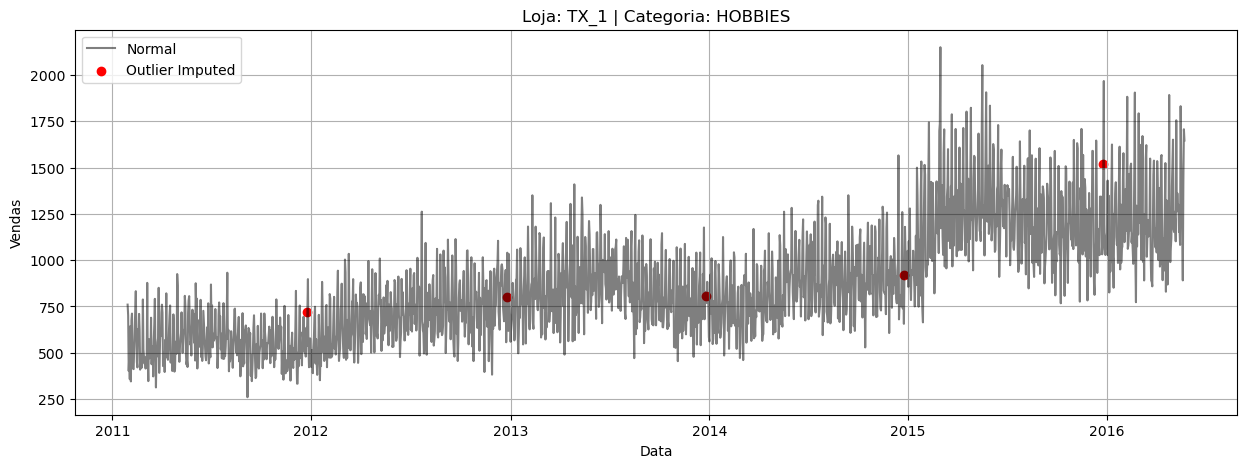

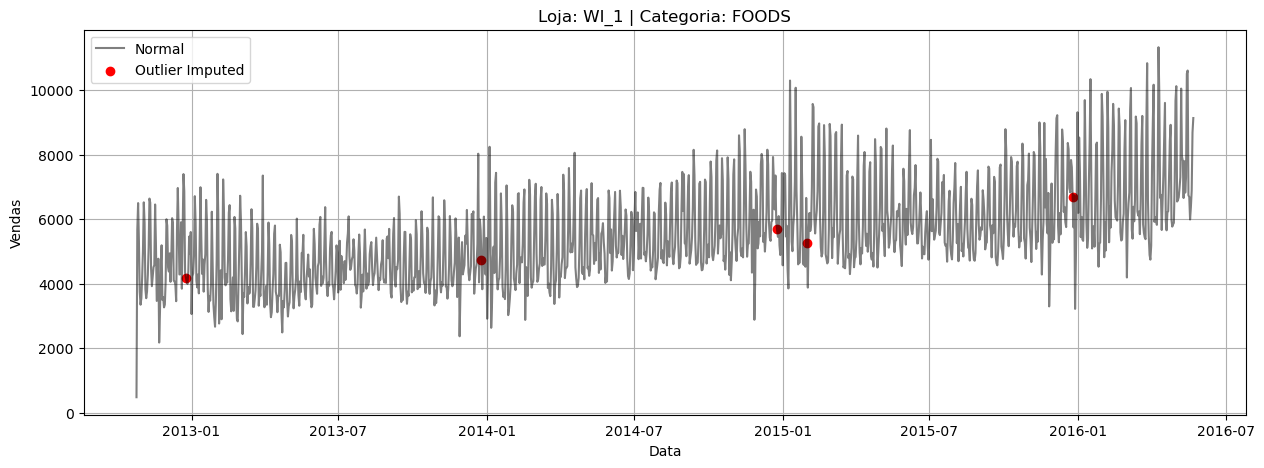

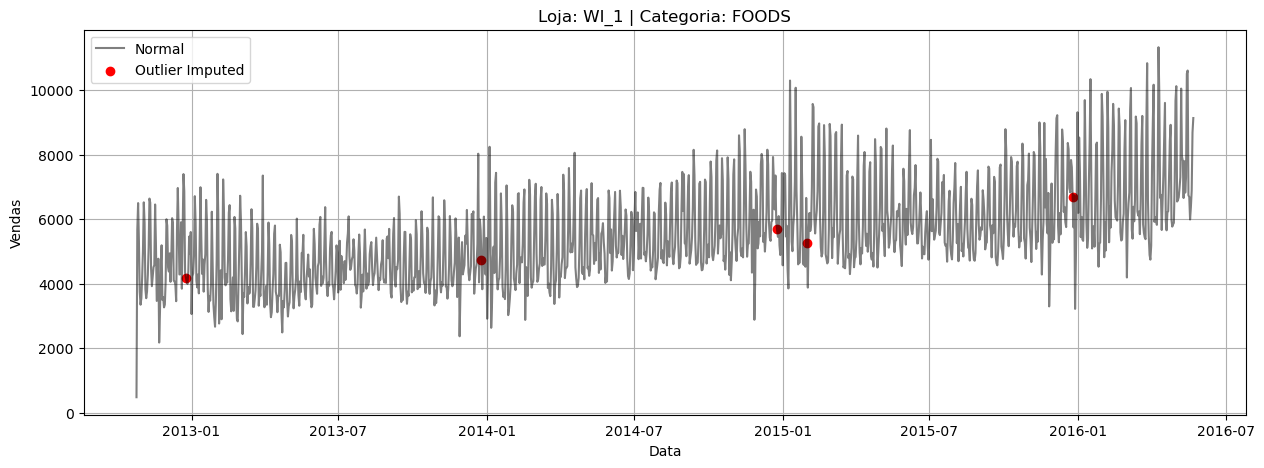

In [21]:
# Amostra uma das categorias de loja para ver como nossa detecção de outliers se comporta
visualizar_sales_imputed(sales_imputed_df, "TX_1", "HOBBIES")
visualizar_sales_imputed(sales_imputed_df, "WI_1", "FOODS")
visualizar_sales_imputed(sales_imputed_df, "WI_1", "FOODS")

In [22]:
sales_imputed_df.reset_index(drop=False,inplace=True)
sales_imputed_df.drop(columns=["series_id", "sales_detrend", "anomaly"], inplace=True)
sales_imputed_df["in_training"] = True
sales_imputed_df = sales_imputed_df[["store_id", "cat_id", "date", "sales", "in_training"]]

In [23]:
# Salvando o dataframe processado
sales_imputed_df.to_parquet("../data/processed/sales_cleaning_processed.parquet")